## Install and Import Necessary Libraries ##

In [27]:
pip install -r ../config/requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


## Concatenate CSVs into a Single DataFrame ##

In [46]:
def read_custom_csv(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(';')
            parts = [p.rstrip(',') for p in parts]
            data.append(parts)
    

    df = pd.DataFrame(data[1:], columns=data[0])
    return df

df1 = read_custom_csv('../data/amenities.csv')
df2 = read_custom_csv('../data/market_analysis_2019.csv')

combined_df = pd.concat([df1, df3], axis=1)

## DataFrame Cleaning ##

In [47]:
cleaning_df = combined_df
cleaning_df.describe

<bound method NDFrame.describe of       ï»¿unified_id    month hot_tub pool ï»¿unified_id    month zipcode  \
0       AIR10052559  2022-12       1    0   AIR10000347   2019-1   92315   
1       AIR10178668  2022-12       0    0   AIR10000347  2019-10   92315   
2       AIR10211700  2022-12       0    0   AIR10000347  2019-11   92315   
3       AIR10344705  2022-12       0    0   AIR10000347  2019-12   92315   
4       AIR10424683  2022-12       0    1   AIR10000347   2019-2   92315   
...             ...      ...     ...  ...           ...      ...     ...   
49306    AIR9959855  2020-01       1    0           NaN      NaN     NaN   
49307    AIR9960008  2020-01       0    0           NaN      NaN     NaN   
49308    AIR9976790  2020-01       1    0           NaN      NaN     NaN   
49309    AIR9986505  2020-01       1    0           NaN      NaN     NaN   
49310    AIR9996370  2020-01       0    0           NaN      NaN     NaN   

                city  host_type bedrooms bathrooms gu


__The decision is made to use the following variables:__

- __hot_tub, pool:__ Evaluate the impact of these amenities on the property's appeal, occupancy, and nightly rate.

- __city:__ Analyze property performance based on geographical location and detect regional differences.

- __host_type:__ Understand how the type of host affects revenue, occupancy, and guest satisfaction.

- __bedrooms, bathrooms, guests:__ Determine the influence of property size and capacity on demand and price.

- __revenue:__ Directly measure the financial success of properties and identify factors that maximize revenue.

- __openness:__ (If referring to availability or promotion) Analyze how exposure affects occupancy and revenue.

- __occupancy:__ Identify demand patterns and evaluate the effectiveness of pricing or promotional strategies.

- __nightly_rate:__ Understand pricing strategy, its impact on occupancy, and guests' perception of value.

- __lead_time:__ Explore guest booking behavior and its impact on property management.

- __length_stay:__ Analyze guest preferences for stay duration and their influence on revenue and management.

The rest will be eliminated as they are not considered relevant for the analysis.

 __Removal of Unnecessary Columns and Null Data__

In [48]:

cleaning_df.drop(["ï»¿unified_id","ï»¿unified_id",
                "ï»¿unified_id","zipcode"], axis=1, inplace=True)

nas_percent = cleaning_df.isnull().mean() * 100
print(nas_percent)


month            0.00000
hot_tub          0.00000
pool             0.00000
month           39.30766
city            39.30766
host_type       39.30766
bedrooms        39.30766
bathrooms       39.30766
guests          39.30766
revenue         39.30766
openness        39.30766
occupancy       39.30766
nightly rate    39.30766
lead time       39.30766
length stay     39.30766
dtype: float64


__Due to the high percentage of null values, it has been decided to eliminate them so that the percentage does not exceed more than 20% per column, allowing for data imputation.__

In [49]:
cleaning_df.dropna(thresh=10, inplace=True) # Thresh, parameter that allows a minimum of 10 non-null records per row
cleaning_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 29928 entries, 0 to 29927
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   month         29928 non-null  object
 1   hot_tub       29928 non-null  object
 2   pool          29928 non-null  object
 3   month         29928 non-null  object
 4   city          29928 non-null  object
 5   host_type     29928 non-null  object
 6   bedrooms      29928 non-null  object
 7   bathrooms     29928 non-null  object
 8   guests        29928 non-null  object
 9   revenue       29928 non-null  object
 10  openness      29928 non-null  object
 11  occupancy     29928 non-null  object
 12  nightly rate  29928 non-null  object
 13  lead time     29928 non-null  object
 14  length stay   29928 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


__Column cleaning__

In [50]:
cleaning_df['guests'] = cleaning_df['guests'].replace('15+', 15)
cleaning_df['guests'] = pd.to_numeric(cleaning_df['guests'])

cleaning_df['bathrooms'] = cleaning_df['bathrooms'].astype(float)

cleaning_df['bedrooms'] = cleaning_df['bedrooms'].astype(float)

cleaning_df['openness'] = cleaning_df['openness'].astype(float)

cleaning_df['revenue'] = cleaning_df['revenue'].str.replace(',','.')
cleaning_df['revenue'] = pd.to_numeric(cleaning_df['revenue'])

cleaning_df['occupancy'] = cleaning_df['occupancy'].str.replace(',','.')
cleaning_df['occupancy'] = pd.to_numeric(cleaning_df['occupancy'])

cleaning_df['nightly rate'] = cleaning_df['nightly rate'].str.replace(',','.')
cleaning_df['nightly rate'] = pd.to_numeric(cleaning_df['nightly rate'])

cleaning_df['lead time'] = cleaning_df['lead time'].str.replace(',','.')
cleaning_df['lead time'] = pd.to_numeric(cleaning_df['lead time'])

cleaning_df['length stay'] = cleaning_df['length stay'].str.replace(',','.')
cleaning_df['length stay'] = pd.to_numeric(cleaning_df['length stay'])

cleaning_df = cleaning_df.rename(columns={
    'nightly rate': 'nightly_rate',
    'lead time': 'lead_time',
    'length stay': 'length_stay'
})

The dtype of columns whose records can be considered as integers or floats is replaced to facilitate the analysis and handling of the data.

__NAs Imputation__

NA imputation is performed where the variables in question are numeric, therefore these values are imputed with the mean.

In [51]:
cleaning_df['length_stay'] = cleaning_df['length_stay'].fillna(cleaning_df['length_stay'].mean())
cleaning_df['lead_time'] = cleaning_df['lead_time'].fillna(cleaning_df['lead_time'].mean())
cleaning_df['revenue'] = cleaning_df['revenue'].fillna(cleaning_df['revenue'].mean())
cleaning_df['nightly_rate'] = cleaning_df['nightly_rate'].fillna(cleaning_df['nightly_rate'].mean())
mean_value = cleaning_df['nightly_rate'].mean()
cleaning_df['nightly_rate'] = cleaning_df['nightly_rate'].apply(lambda x: mean_value if x < 0 else x)

nas_percent = cleaning_df.isnull().mean() * 100
print(nas_percent)

month           0.0
hot_tub         0.0
pool            0.0
month           0.0
city            0.0
host_type       0.0
bedrooms        0.0
bathrooms       0.0
guests          0.0
revenue         0.0
openness        0.0
occupancy       0.0
nightly_rate    0.0
lead_time       0.0
length_stay     0.0
dtype: float64


__Handling of Outliers__

To avoid problems during the analysis, outliers will be identified using the Interquartile Range (IQR) and will subsequently be replaced by the lower or upper limits where deemed necessary.


First, outliers are shown by columns.

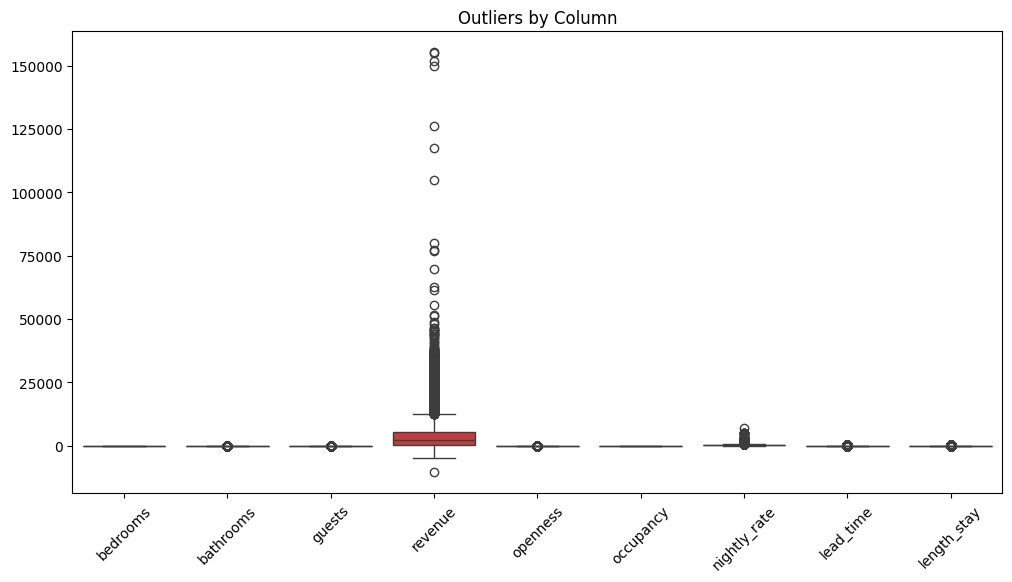

In [53]:
numeric_cols = cleaning_df.select_dtypes(include=['int64', 'float64', 'int32']).columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaning_df[numeric_cols])
plt.title('Outliers by Column')
plt.xticks(rotation=45)
plt.show()

In [56]:

for col in numeric_cols:
    Q1 = cleaning_df[col].quantile(0.25)
    Q3 = cleaning_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #Adjusts values that are outside the lower and upper limits
    
    cleaning_df[col] = np.where(cleaning_df[col] < lower_bound, lower_bound, cleaning_df[col])
    cleaning_df[col] = np.where(cleaning_df[col] > upper_bound, upper_bound, cleaning_df[col])


Check Outliers again

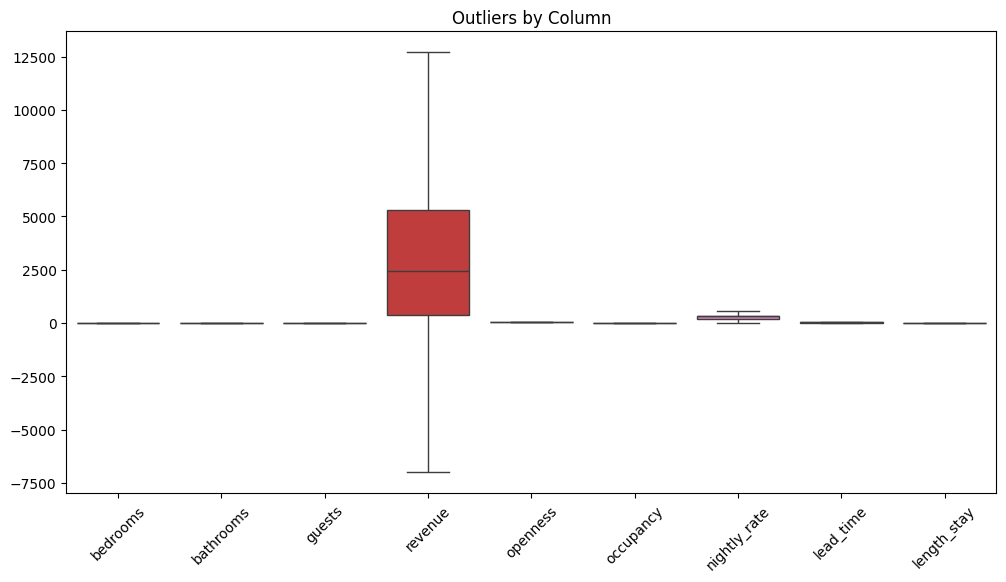

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaning_df[numeric_cols])
plt.title('Outliers by Column')
plt.xticks(rotation=45)
plt.show()

__Save a New CSV with Processed Data__

In [36]:
cleaning_df.to_csv('../data/processed_data/clean_data.csv', index=False)

## *Exploratory Data Analysis (EDA)* 

In [37]:
eda_df = pd.read_csv('../data/processed_data/clean_data.csv')
eda_df.describe()

,hot_tub,pool,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly_rate,lead_time,length_stay
count,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000,29928.000000
mean,0.531342,0.091987,3.383420,2.393294,8.905289,3477.330475,30.236952,0.400428,302.056605,26.304027,3.134672
std,0.499025,0.289013,0.610313,0.757107,2.541780,3602.755964,0.920702,0.333166,136.761815,17.756030,1.825101
min,0.000000,0.000000,3.000000,1.000000,3.000000,-7011.684885,28.500000,0.000000,0.649999,1.000000,1.000000
25%,0.000000,0.000000,3.000000,2.000000,7.000000,379.970001,30.000000,0.066667,192.560338,10.666667,1.785714
50%,1.000000,0.000000,3.000000,2.000000,8.000000,2449.635009,31.000000,0.366667,319.237331,30.968204,2.500000
75%,1.000000,0.000000,4.000000,3.000000,10.000000,5307.739925,31.000000,0.645161,348.021700,30.968204,4.749503
max,1.000000,1.000000,5.000000,4.500000,14.500000,12699.394811,31.000000,1.000000,581.213744,61.420510,9.195185


__With the data already processed, distributions for numerical and categorical variables are made.__

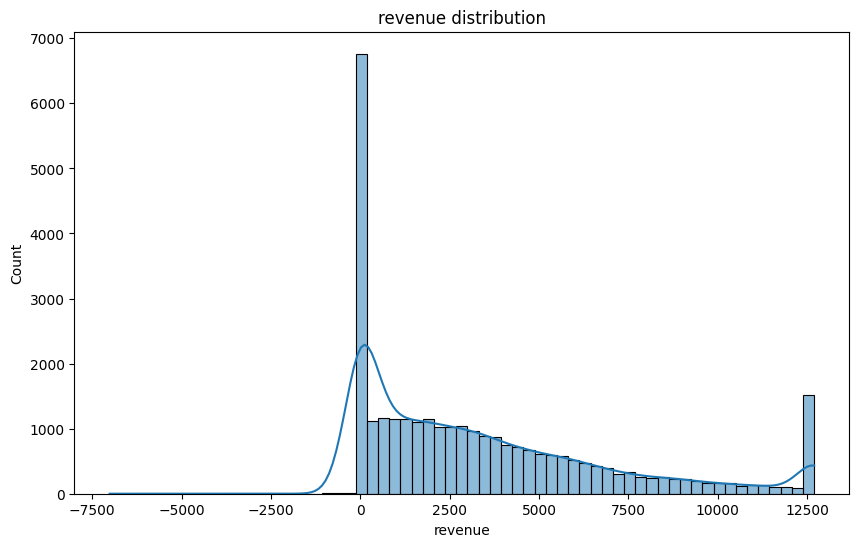

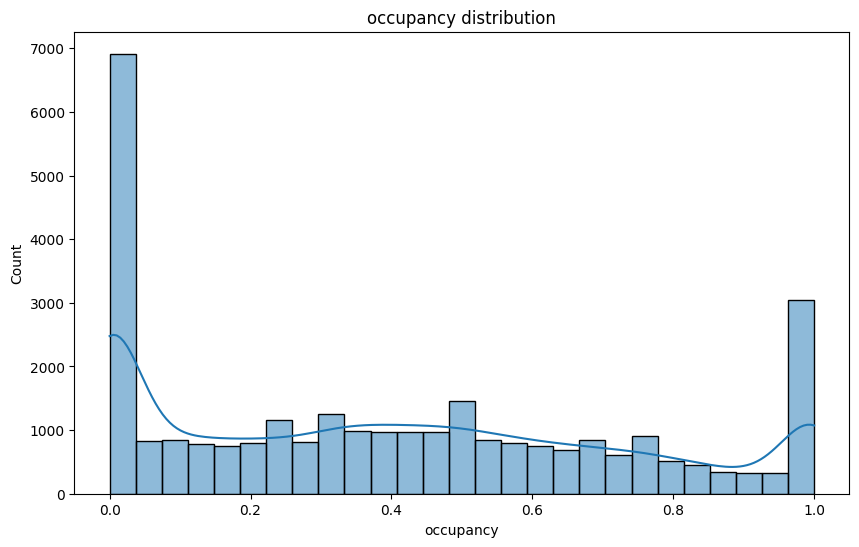

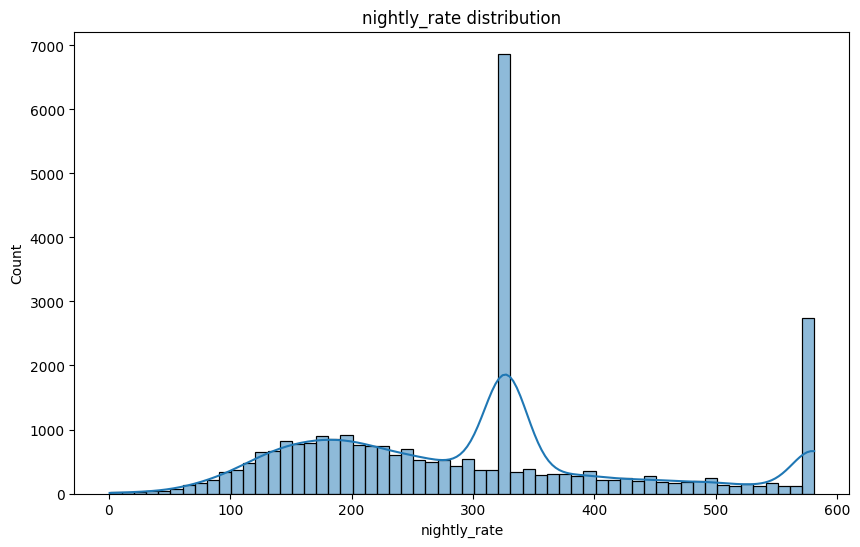

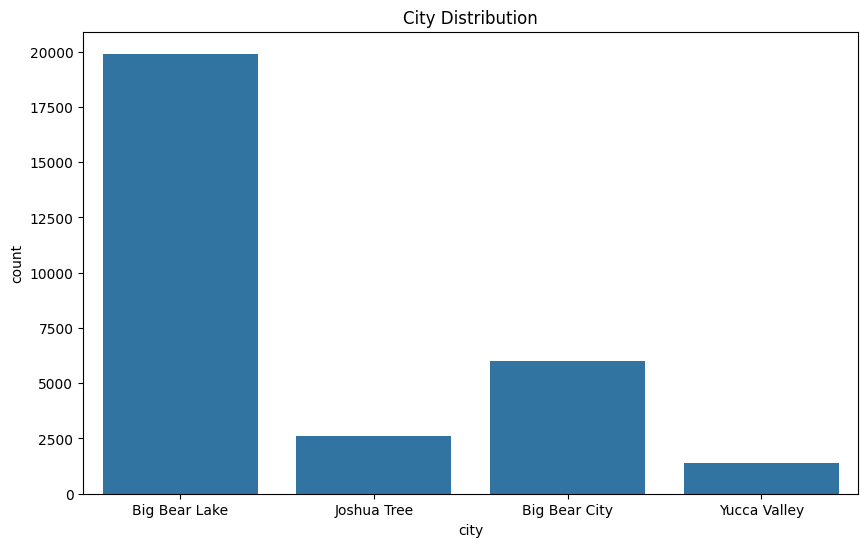

In [38]:
# For numeric variables
for col in ['revenue', 'occupancy', 'nightly_rate']:
    plt.figure(figsize=(10, 6))
    sns.histplot(eda_df[col], kde=True)
    plt.title(f'{col} distribution')
    plt.show()

# For categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(data=eda_df, x='city')
plt.title('City Distribution')
plt.show()

__Based on these graphs, the following interpretations can be made:__

- __Revenue:__
    
    - Distribution: There is a prominent vertical bar at the value 0 on the X-axis, indicating a high number of transactions that were either canceled or stored.

    - Positive Revenue: To the right of the value 0, there are smaller bars showing a positive distribution of revenue, representing sales that were completed.

    - Negative Revenue: To the left of the value 0, the values represent sales that were stored and then canceled.

- __Occupancy:__

    - Distribution: There are two prominent peaks in the graph at the occupancy values of 0.0 and 1.0, indicating that the majority of      observations are found at these two values.

    - Peaks: There is a significant peak in the count when occupancy is 0.0, with more than 6000 counts. Another notable peak occurs when the occupancy is 1.0, though this peak is much smaller than the first.

    - Intermediate Values: Between these two peaks, the count significantly decreases and fluctuates between approximately 100 and just over 1000 counts for the intermediate occupancy values.

- __Nightly Rate:__
    - Distribution: The bars represent the frequency of each nightly rate. The bars are more prominent in specific nightly rate ranges, especially around 300 and 500. This indicates that most of the nightly rates fall within these ranges.

    - Peaks: The peaks in the graph represent the most common values of the nightly rates. A higher peak means that this nightly rate value is more common in the data.

- __City:__

    Distribution: The bars represent the frequency of each city. 
    
    - Big Bear Lake has the highest frequency, reaching close to 20,000. 
    
    - Joshua Tree and Yucca Valley have the lowest frequencies, just above and below 2,500 respectively. 
    
    - Big Bear City has an intermediate frequency around 7,500.

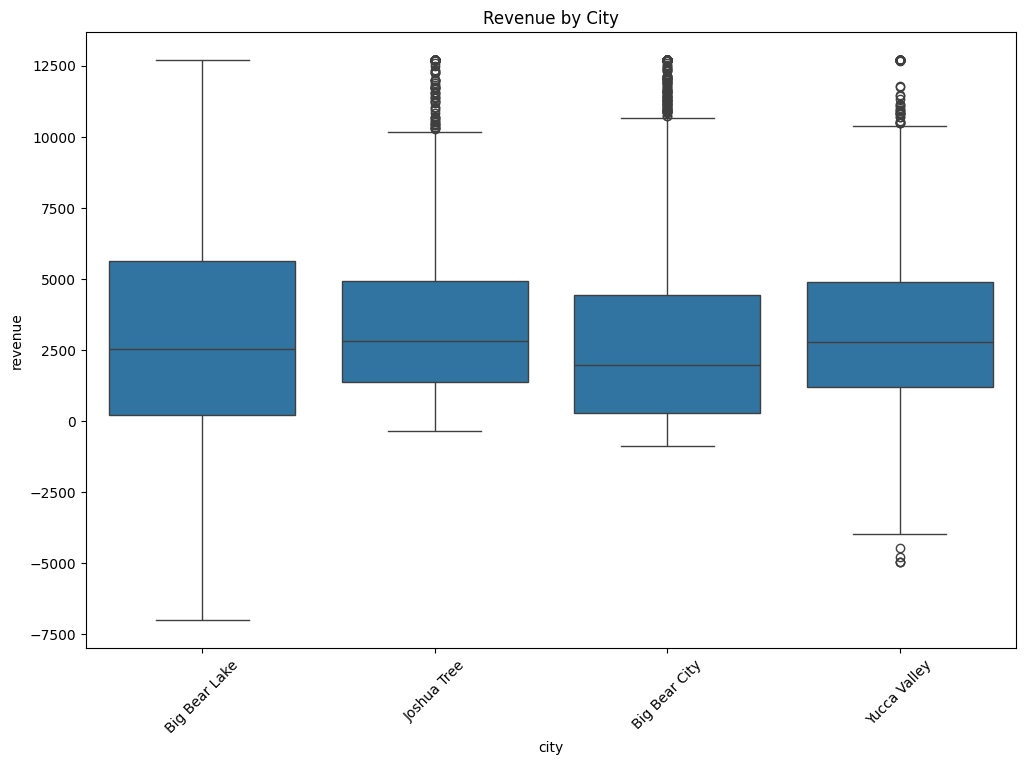

In [39]:
# Revenue analysis by city
plt.figure(figsize=(12, 8))
sns.boxplot(data=eda_df, x='city', y='revenue')
plt.xticks(rotation=45)
plt.title('Revenue by City')
plt.show()

- Boxes: Each box in the graph represents the interquartile range of revenue for each city, which is the range within which the central half of the data lies. The line within each box indicates the median revenue, which is the middle value of the data.

- Whiskers: The whiskers extending from each box show the range of revenue within 1.5 times the interquartile range. This provides an indication of the variability of revenue in each city.

- Circles: The small circles above and below the whiskers represent outlier values in revenue for each city. These are values that fall outside the typical range of revenue.

- General Interpretation: The median revenue for Big Bear Lake is higher than the other cities, while Lucerne Valley has a wider interquartile range, indicating greater variability in revenue. There are also several outlier values in the data for each city.

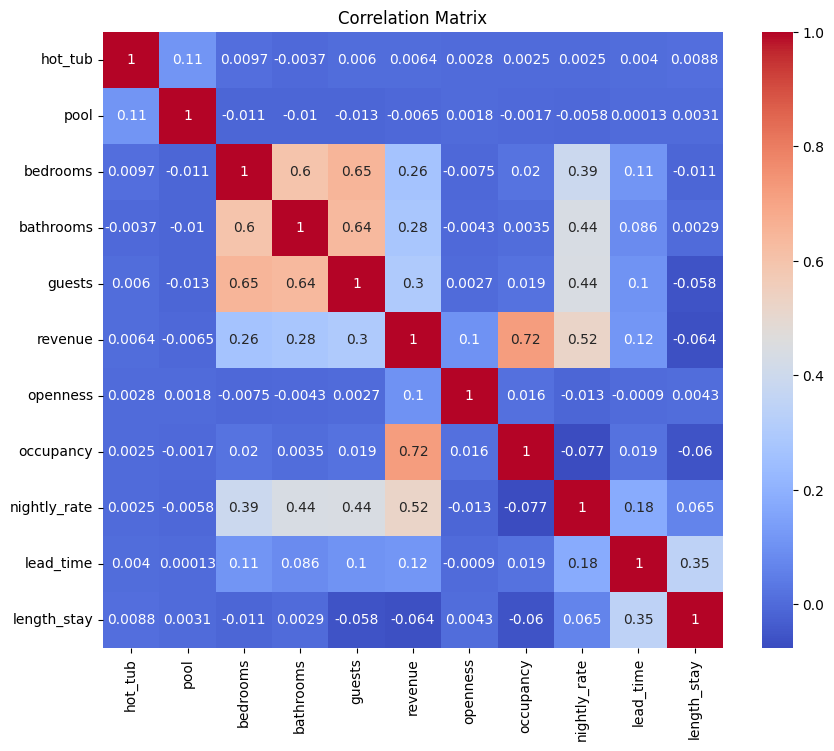

In [40]:
num_df = eda_df.select_dtypes(include=['float64', 'int64'])

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Correlation Coefficients: The numbers in the matrix represent the correlation coefficients between the variables. A correlation coefficient ranges between -1 and 1. A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation.

- The variable "bedrooms" and "bathrooms" seem to have a strong positive correlation, meaning that as the number of bedrooms increases, the number of bathrooms also tends to increase.

- Guests and Bedrooms: These two variables also seem to have a positive correlation. This could indicate that properties with more rooms tend to accommodate more guests.

- Revenue and Bedrooms: These variables seem to have a positive correlation. This could suggest that properties with more rooms generate more income.